In [518]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import seaborn as sb
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', 50)
pd.set_option('display.float_format', lambda x: '%.0f' % x)
%matplotlib inline

## Data gathering

1. locally stored twitter-archive-enhanced.csv
2. Downloading https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
3. Get additional information using Python's Tweepy library e.g. retweet count, likes
4. Each tweet's JSON data should be written to its own line.
 Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, 
 retweet count, and favorite count.

In [519]:
#Downloading code below is commented out to avoid repeat download

#image_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
#r = requests.get(image_url, allow_redirects=True)
#open('image-predictions.tsv', 'wb').write(r.content)

In [520]:
# Loading the image-predictions.tsv in to a data frame
df_image = pd.read_csv('image-predictions.tsv', sep= '\t')

In [521]:
#data frame sanity check
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2075,2075,2075,2075,2075
mean,738451357852539008,1,1,0,0
std,67852033330235656,1,0,0,0
min,666020888022790144,1,0,0,0
25%,676483507139540992,1,0,0,0
50%,711998809858043904,1,1,0,0
75%,793203448525178880,1,1,0,0
max,892420643555336192,4,1,0,0


In [522]:
#Downloading code below is commented out to avoid repeat download

#url_enhanced = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv'  
#r = requests.get(url_enhanced, allow_redirects=True)
#open('twitter-archive-enhanced.csv', 'wb').write(r.content)

In [523]:
# Loading the twitter-archive-enhanced.csv in to a data frame

df_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [524]:
# df_enhanced sanity check
df_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2356,78,78,181,181,2356,2356
mean,742771590321719808,745507917855750656,20141706360873208,772039961038007040,12416983653017580,13,10
std,68567047444761032,75824920044192880,125279666255236320,62369278105055600,95992535331517536,46,7
min,666020888022790144,665814696700723200,11856342,666104133288665088,783214,0,0
25%,678398938214475776,675741911993464832,308637449,718631497683582976,4196983835,10,10
50%,719627934716235776,703870840226598912,4196983835,780465709297995776,4196983835,11,10
75%,799337304954252288,825780371286566912,4196983835,820314633777061888,4196983835,12,10
max,892420643555336192,886266357075128320,840547864354918400,887473957103951872,787461778435289088,1776,170


In [525]:
#tweepy code commented out to avoid repeat download attempts with removed Keys 

# import tweepy
# CONSUMER_KEY = 'xxxxxxxxxxxxxxxxxxxx'
# CONSUMER_SECRET = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
# ACCESS_TOKEN = 'xxxxxxxxxxxxxxxxxxxxxxxxxxx'
# ACCESS_TOKEN_SECRET = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
# auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
# auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
# api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(), wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [526]:
# Function to extract retweet_count, favorite_count and tweet_id from tweet json. 

import json
def extract_tweet_status_info(text_file):
    retweet_count_list=[]
    favorite_count_list=[]
    id_list=[]
    for line in text_file:
        json_content = json.loads(line)
        retweet_count_list.append(json_content['retweet_count'])
        favorite_count_list.append(json_content['favorite_count'])
        id_list.append(json_content['id'])
    d={'retweet_count': retweet_count_list, 'favorite_count':favorite_count_list, 'tweet_id': id_list}
    return pd.DataFrame(d)


In [527]:
#json downloading code using tweepy api, commented out to avoid repeat downalod 

# tweet_ids_not_found = []
# with open('tweet_json.txt', 'w', encoding="utf-8") as tweet_file:
#     for t_id in df_enhanced['tweet_id']:
#         try:
#             tweet_file.write(str(api.get_status(t_id)) + '\n')
#         except:
#             tweet_ids_not_found.append(t_id)
#             continue


In [528]:
# Loading downloaded tweet_json_copy.txt in to a data frame
with open('tweet_json_copy.txt', 'r') as tweet_file_copy:
    df_api = extract_tweet_status_info(tweet_file_copy)

df_api.head(2)

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426


## Detect and document at least eight (8) quality issues and two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook

### Quality Issues
    
**1. Missing Records**

i) Coulmns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp having large numbers of NaN <br/>
ii) 2 tweet_ids not found in data obtained through api. 2356 ids are there in twitter-archive-enhanced.csv wheras tweet_json.txt contains 2354 unique tweet ids.
iii) 281 tweet_ids are missing from image-predictions.tsv in comparison to twitter-archive-enhanced.csv
iv) None and a do not seem to be names, 576 names are "None" and 55 names are "a" 


**2. Validity issues<br/>**

i) 5 ratings numerators not extracted correctly in the rating_numerator column<br/>
ii) 1 ranting's denominator not extracted correctly<br/>
iii) data type for the following columns should be changed:<br/>
    a. TimeStamp should be chnaged to datetime<br/>
    b. rating_numerator, rating_denominator type should be changed to float<br/>

**3. Accuracy issues**

i) Source column does not contain full source content and has curtailed source data which is not useful
ii) 79 retweets are present in the data set, need to remove these.

**4. Consistency issues**



### Tidyness issues:

i) Dog stages has 4 columns which can be consolidated in to one column.<br?>
ii) tweets info are distrubuted in different tables which can be merged in to one.

In [529]:
#merging the df_api with retweet_count, favorite_count in to main data frame

df_enhanced_merge = pd.merge(df_enhanced, df_api, on='tweet_id')
df_enhanced_merge.head(2)
#checking how many unique tweet ids are there in each of the data frames
df_enhanced_merge['tweet_id'].nunique(), df_api.tweet_id.nunique(), df_image.tweet_id.nunique()

(2354, 2354, 2075)

## Data Wrangling to address Quality and Tidyness Issues

#### Tidyness Issue ii) merging different tweets datasets in to one

In [530]:
# merging image data frame also in to df_enhanced_merge which already has df_enhanced and df_api contents
df_enhanced_merge_img = pd.merge(df_enhanced_merge,df_image, on='tweet_id' )

In [531]:
# checking effect on data frame dimentions after the merges
df_enhanced_merge_img.shape, df_enhanced_merge.shape, df_enhanced.shape

((2073, 30), (2354, 19), (2356, 17))

In [532]:
df_enhanced_merge_img.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0,False,bagel,0,False,banana,0,False
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",nan,nan,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0,True,Pekinese,0,True,papillon,0,True


Dataset issues identification

Issue: 1 checking issues pertaining to ratings in the data set

In [533]:
df_enhanced.groupby('rating_numerator').nunique()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
rating_numerator,,,,,,,,,,,,,,,,,
0,2,1,1,2,1,2,0,0,0,2,1,1,1,1,1,1,1
1,9,3,1,9,2,9,1,1,1,5,1,2,2,1,1,1,1
2,9,0,0,9,1,9,0,0,0,9,1,1,6,1,1,1,1
3,19,0,0,19,1,19,0,0,0,19,1,1,12,1,1,2,1
4,17,1,1,17,1,17,0,0,0,16,1,2,7,1,1,1,1
5,37,2,1,37,3,37,1,1,1,35,1,1,16,2,1,2,1
6,32,0,0,32,1,32,0,0,0,32,1,1,20,1,1,2,1
7,55,2,1,55,2,55,1,1,1,52,1,2,35,1,1,2,1
8,102,0,0,102,3,102,4,1,4,98,1,1,73,2,1,2,1


Issue2: Entry duplicate stage classification for example 14 entries below classified as doggo and one or more out of floofer, pupper, and puppo

In [534]:
df_enhanced[(df_enhanced['doggo']=='doggo') & ((df_enhanced['floofer']!='None') | (df_enhanced['pupper']!='None') | (df_enhanced['puppo']!='None'))].shape

(14, 17)

In [535]:
# NaN columns check
df_enhanced_merge_img.info()
df_enhanced_merge_img.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
favorite_count                2073 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0,False,bagel,0,False,banana,0,False
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",nan,nan,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0,True,Pekinese,0,True,papillon,0,True


#### 3(ii) Remove retweets rows from the dataset

In [559]:
df_enhanced_merge_img = df_enhanced_merge_img.drop(df_enhanced_merge_img[~df_enhanced_merge_img['retweeted_status_id'].isna()].index)

#### 1 (i) As i am not making use of these columns in my analysis, dropping in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp. Resulting data frame would be clean_df_1

In [537]:
clean_df_1 = df_enhanced_merge_img.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

#### 1(ii) and 1(iii) Merging has been done on tweet_id, unfound tweet_ids are not present in df_enhanced_merge_img 
#### 1(iv) Names are not affecting any other analysis than names popularity analysis so keeping this as is

In [538]:
clean_df_1.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0,False,bagel,0,False,banana,0,False


#### 2(iii) data type for the following columns should be changed
    a. TimeStamp should be chnaged to datetime
    b. rating_numerator, rating_denominator type should be changed to float

In [539]:
clean_df_1 = clean_df_1.astype({"rating_numerator": float, "rating_denominator": float})

In [540]:
clean_df_1['timestamp'] = pd.to_datetime(clean_df_1['timestamp'])

In [541]:
clean_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 25 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null float64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
favorite_count        1994 non-null int64
retweet_count         1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 n

#### Tidyness issue 1: Dog stages has 4 columns which can be consolidated in to one column

In [542]:
clean_df_1[['doggo', 'floofer', 'pupper', 'puppo']] = clean_df_1[['doggo', 'floofer', 'pupper', 'puppo']].replace('None', np.NaN)

In [543]:
clean_df_1.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,NaN,NaN,NaN,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0,False,bagel,0,False,banana,0,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,NaN,NaN,NaN,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0,True,Pekinese,0,True,papillon,0,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,NaN,NaN,NaN,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,1,True,malamute,0,True,kelpie,0,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,NaN,NaN,NaN,42908,8964,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0,False,Labrador_retriever,0,True,spatula,0,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,NaN,NaN,NaN,41048,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,1,True,English_springer,0,True,German_short-haired_pointer,0,True


In [544]:
clean_df_1['Stages'] = clean_df_1[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda x: ', '.join(x[x.notnull()]), axis = 1)
clean_df_1['Stages'] = clean_df_1['Stages'].replace('', np.NaN)
clean_df_1.Stages.value_counts()

pupper            203
doggo             63 
puppo             22 
doggo, pupper     9  
floofer           7  
doggo, floofer    1  
doggo, puppo      1  
Name: Stages, dtype: int64

In [545]:
#Dropping the 'doggo', 'floofer', 'pupper', 'puppo' columns as these have been merged to one 'Stages' column
clean_df_1 = clean_df_1.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)
clean_df_1.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Stages
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0,False,bagel,0,False,banana,0,False,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0,True,Pekinese,0,True,papillon,0,True,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,1,True,malamute,0,True,kelpie,0,True,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,42908,8964,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0,False,Labrador_retriever,0,True,spatula,0,False,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,41048,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,1,True,English_springer,0,True,German_short-haired_pointer,0,True,NaN


#### 2(i)  5 ratings numerators not extracted correctly in the rating_numerator column

In [546]:
text_numerator_rate = clean_df_1['text'].str.extract(r'(\d+[.]?\d*(?=[/]))')
text_numerator_rate = text_numerator_rate.astype('float')
rating_numerator_float = clean_df_1.rating_numerator.astype('float')
clean_df_1[clean_df_1.rating_numerator != text_numerator_rate]
#finding: 4 tweets have their Rating numerators NOT extracted out correctly

C:\Users\Nafeez Quraishi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Stages
40,883482846933004288,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,46860,10407,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1,golden_retriever,1,True,Labrador_retriever,0,True,kuvasz,0,True,NaN
558,786709082849828864,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,20296,7069,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,Pomeranian,0,True,Persian_cat,0,False,chow,0,True,NaN
614,778027034220126208,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,7320,1885,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1,clumber,1,True,cocker_spaniel,0,True,Lhasa,0,True,pupper
1451,680494726643068929,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,1879,542,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1,kuvasz,0,True,Samoyed,0,True,Great_Pyrenees,0,True,NaN


In [547]:
#replacing the incorrectly extracted values with correct values
clean_df_1.loc[40,'rating_numerator'] = 13.5
clean_df_1.loc[558,'rating_numerator'] = 9.75
clean_df_1.loc[614,'rating_numerator'] = 11.27
clean_df_1.loc[1451,'rating_numerator'] = 11.26

In [548]:
#Sanity check for values replacement done
clean_df_1[clean_df_1.rating_numerator != text_numerator_rate]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Stages


In [549]:
text_denominator_rating = clean_df_1['text'].str.extract(r'(?<=[/])(\d+[.]?\d*)')
text_denominator_rating = text_denominator_rating.astype('float')
rating_denominator_float = clean_df_1.rating_denominator.astype('float')
clean_df_1[clean_df_1.rating_denominator != text_denominator_rating]

C:\Users\Nafeez Quraishi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Stages


#### 2(ii) 1 ranting's denominator not extracted correctly

There seems to be no extraction issue from text except, 666287406224695296 at an index 2052 has two ratios and 3 1/2 is getting misinterpreted as rating ratio. Since its only one entry, will fix it specifically.

In [550]:
# Fixing numerator and denominator of 2052
clean_df_1.loc[2052,'rating_denominator'] = 10
clean_df_1.loc[2052, 'rating_denominator'] = 9

In [551]:
clean_df_1.to_csv('twitter_archive_master.csv', sep='\t', encoding='utf-8')

In [552]:
clean_df_1.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Stages
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0,False,bagel,0,False,banana,0,False,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0,True,Pekinese,0,True,papillon,0,True,NaN


### 3 Insights and One Visualization

In [553]:
clean_df_1.groupby(['rating_numerator'])['favorite_count'].sum()

rating_numerator
0       27742  
1       27999  
2       20311  
3       45515  
4       45487  
5       83504  
6       86943  
7       180033 
8       232836 
9       384646 
10      20296  
10      1729180
11      2725682
11      1879   
11      7320   
12      5069841
13      5919975
14      46860  
14      1009921
24      5927   
44      3748   
45      2634   
50      2574   
60      3201   
80      2529   
84      13518  
88      2927   
99      3062   
121     4225   
143     1369   
144     3323   
165     5316   
204     4196   
420     7989   
1776    5569   
Name: favorite_count, dtype: int64

In [554]:
rating_fav_count_df = clean_df_1.groupby(['rating_numerator'])['favorite_count'].sum()

Text(0.5,0,'rating_numerator')

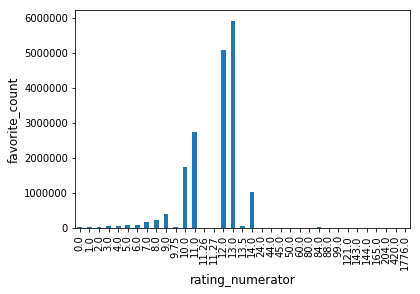

In [555]:
base_color = color=sb.color_palette()[0]
rating_fav_count_df.plot.bar(color = base_color)
plt.ylabel('favorite_count', fontsize=12)
plt.xlabel('rating_numerator', fontsize=12)

#### Insight 1: Increase in rating showing fav_count increase as well, which seems to be inline with the expectation. 

#### Insight 2: On Checking why 14 rating got drop in favorite count, it seems average favorite count is higher so this should not be taken as a drop as such

In [ ]:

clean_df_2[clean_df_2['rating_numerator'] == 14]

In [560]:
clean_df_2['name'].value_counts().head(10)

None       577
a          55 
Charlie    11 
Cooper     10 
Lucy       10 
Tucker     10 
Oliver     10 
Penny      10 
Lola       8  
Winston    8  
Name: name, dtype: int64

#### Insight 3: None and a do not seem to be names, so Charlie, Penny, Cooper, Tucker, Lucy and OLiver seems to be popular names

In [561]:
clean_df_2[clean_df_2['p1_conf'] >= 0.5].p1.value_counts().head(5)

golden_retriever      126
Pembroke              70 
Labrador_retriever    69 
Chihuahua             50 
pug                   45 
Name: p1, dtype: int64

#### Insight 4: By far golden_retriever looks to be most popular breed which has got recognized with more than 50% probablity